In [13]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [14]:
d = datetime(4,12,26);
print d.date

ms = gps_particle_data.meta_search();

e = gps_particle_data.event("Boxing Day Earthquake");
e.add_date(mins=59,hh=00,dd=26,mm=12,yy=04);
e.add_data("Geographic_Latitude",3.24);
e.add_data("Geographic_Longitude",95.8);

start_date = datetime(4,12,19);
end_date = datetime(5,1,16);

ms.load_data(start_date,end_date);
ms.apply_search(e, 21);
#ms.extend_time_window(15);

output_data = ms.get_selected_data("decimal_day");


<built-in method date of datetime.datetime object at 0x7f54507d15a8>
File ns41_041219_v1.03.ascii already exists 

Reading file ns41_041219_v1.03.ascii

Min Latitude         :  -56.1881
Max Latitude         :  56.1904
Min Longitude         :  -179.9404
Max Longitude         :  177.8825
Min Radius         :  4.161329
Max Radius         :  4.176166
Min L Shell         :  4.118633
Max L Shell        :  25.0
Min Day            :  354.000683
Max Day            :  360.997905
Year             :  2004.0

File ns41_041226_v1.03.ascii already exists 

Reading file ns41_041226_v1.03.ascii

Min Latitude         :  -179.2694
Max Latitude         :  178.2377
Min Longitude         :  -179.5841
Max Longitude         :  178.1846
Min Radius         :  1.3833
Max Radius         :  7185.471
Min L Shell         :  1.959381
Max L Shell        :  25.0
Min Day            :  361.000683
Max Day            :  -31.9926
Year             :  2004.0

File ns41_050102_v1.03.ascii already exists 

Reading file ns41_050


Reading file ns59_050102_v1.03.ascii

Min Latitude         :  -54.9711
Max Latitude         :  54.9696
Min Longitude         :  -179.9653
Max Longitude         :  179.9847
Min Radius         :  4.155689
Max Radius         :  4.181649
Min L Shell         :  4.126499
Max L Shell        :  999.0
Min Day            :  2.000544
Max Day            :  8.997766
Year             :  2005.0

File ns59_050109_v1.03.ascii already exists 

Reading file ns59_050109_v1.03.ascii

Min Latitude         :  -54.9602
Max Latitude         :  54.9599
Min Longitude         :  -179.9163
Max Longitude         :  178.9833
Min Radius         :  4.155746
Max Radius         :  4.181571
Min L Shell         :  4.129611
Max L Shell        :  999.0
Min Day            :  9.000544
Max Day            :  15.997766
Year             :  2005.0

File ns59_050116_v1.03.ascii already exists 

Reading file ns59_050116_v1.03.ascii

Min Latitude         :  -54.9601
Max Latitude         :  54.9582
Min Longitude         :  -179.5363


In [15]:
print output_data.keys()

['ns41_041219', 'ns61_041219', 'ns60_041219', 'ns59_041219', 'ns54_041226', 'ns56_041219', 'ns56_041226', 'ns61_041226', 'ns59_041226', 'ns60_041226', 'ns54_041219', 'ns41_041226']


KeyError: 'ns41_050102'

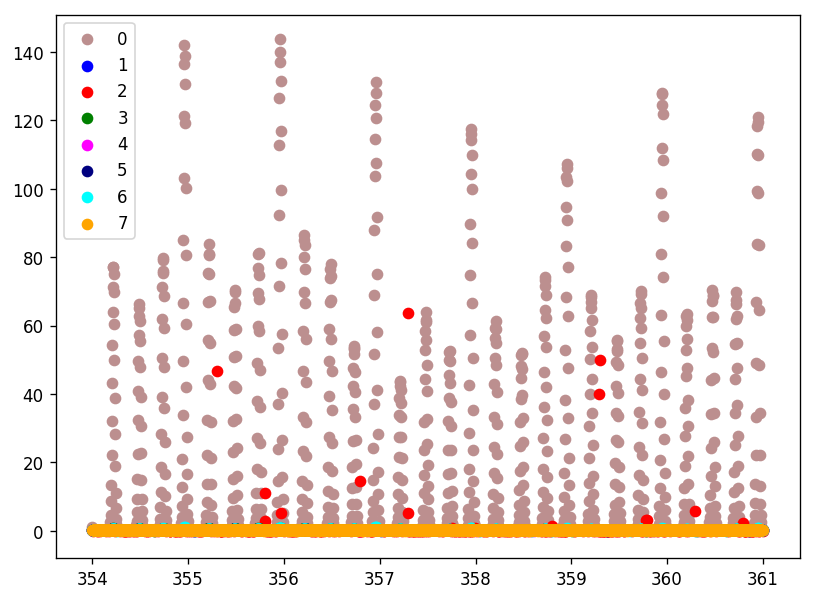

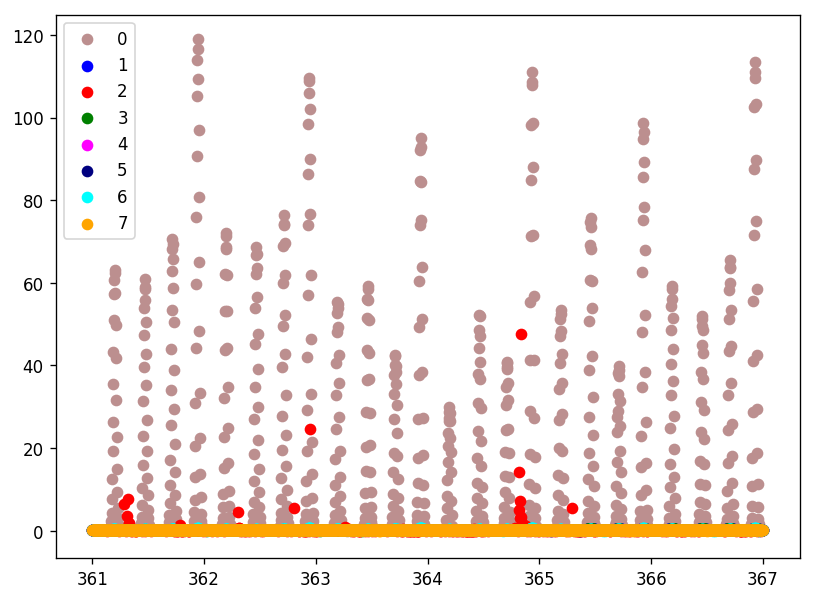

In [17]:
data_index = 0;
signal = 'rate_proton_measured'
background = 'proton_background'
sat = 'ns41'
for date in ['041219', '041226', '050102', '050109', '050116']:
    filename = sat + '_' + date
    x =  output_data[filename]["decimal_day"][:]
    tmp = output_data[filename][signal][:];

    k = len(tmp[0])
    p_eng = np.array_split(tmp, range(k), axis = 1)

    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']
    fig = plt.figure(figsize=(8, 6), dpi=120)
    ax = fig.add_subplot(111)
    for j in range(k):
        ax.scatter(x, p_eng[j+1], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')

plt.show()

['ns59_050102', 'ns60_050109', 'ns59_050109', 'ns59_050123', 'ns60_050102', 'ns61_050102', 'ns54_050116', 'ns41_041226', 'ns61_050123', 'ns61_050109', 'ns41_050123', 'ns56_050116', 'ns41_050102', 'ns61_041226', 'ns41_050109', 'ns59_050116', 'ns54_050109', 'ns60_050116', 'ns54_050102', 'ns54_041226', 'ns54_050123', 'ns56_041226', 'ns59_041226', 'ns61_050116', 'ns56_050123', 'ns41_050116', 'ns56_050102', 'ns60_041226', 'ns56_050109', 'ns60_050123']


'for fn in output_data.keys():\n    print fn;\n    for ikey in output_data[fn].keys():\n        print ikey;\n        print output_data[fn][ikey][0];\n        print output_data[fn][ikey][-1];'